# <center> *Big Data project* </center> 
### <center> *M2 Statistics & Econometrics, 2019-2020* </center>
_<center>Mehdi BERRADA - Vincent BLOT - Pauline CARAMEL - Sarah LAUZERAL</center>_

---

The goal of this project is to detect several attributes on different images. Image recognition is one of the many applications of Machine Learning, it is largely and widely used from FaceID to unlock your phone to safety device, this type of technology is now part of our daily life. In this project we will use a database originally collected by researchers from the MMLAB (Chinese University of Hong Kong) for the paper *From Facial Parts Responses to Face Detection: A Deep Learning Approach* (https://arxiv.org/abs/1509.06451).

In this project, we will build a Machine Learning Algorithm using Neural Networks to predict from a giving picture if the celebrity has or not a certain attribute.

The CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset that covers large pose variations and background clutter. CelebA has large diversities, large quantities, and rich annotations, indeed it contains:

 - 10,177 different identities,
 - 202,599  face images,
 - 5 landmark locations and
 - 40 binary attributes annotations per image.

---

Import librairies

In [0]:
import os
import zipfile
import pickle
import random
import base64
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from PIL import Image
from numpy import expand_dims
from google.colab import drive
from IPython.core.display import display, HTML
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0-rc2


Using TensorFlow backend.


Connection to the drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzipping files

In [0]:
with zipfile.ZipFile('/content/drive/My Drive/Big Data/Projet/celeba-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/img/')

## **1. Data exploration**

See the notebook : 01-Data Exploration


## **2. Resampling**


See the notebook : 02-Creation of the samples

## **3. Modelling**

### ***a) Attractive model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open('/content/drive/My Drive/Big Data/Projet/Listes sample/Attractive.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Attractive"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

182599

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((len(ValidSamp), 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((64, 64))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
Attractive_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/Best_Attractive_model.hdf5")
Attractive_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 64)       

**Filters visualisation:** The simplest visualization to perform is to plot the learned filters directly. The learned filters are simply weights, but because of the two-dimensional structure of the filters, the weight values have a spatial relationship to each other and plotting each filter as a two-dimensional image is meaningful (or could be).

conv2d_2 (3, 3, 3, 32)


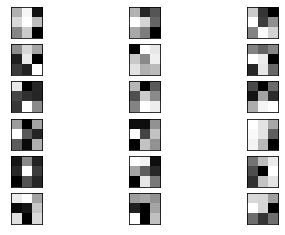

conv2d_3 (3, 3, 32, 32)


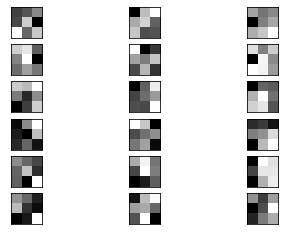

conv2d_4 (3, 3, 32, 64)


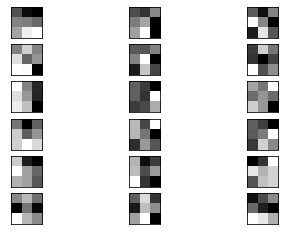

conv2d_5 (3, 3, 64, 64)


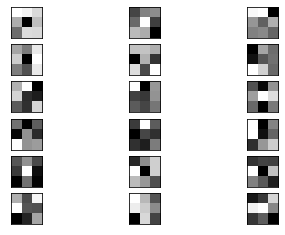

conv2d_6 (3, 3, 64, 64)


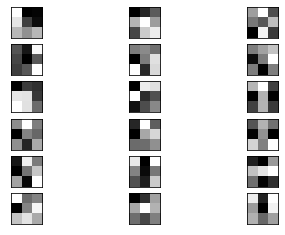

conv2d_7 (3, 3, 64, 128)


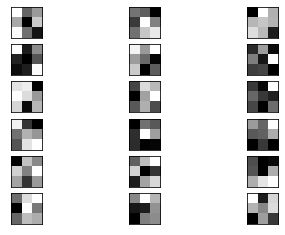

In [0]:
for layer in Attractive_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1
    # show the figure
    plt.show()

**Feauture maps visualization:** The activation maps, called feature maps, capture the result of applying the filters to an input image. The idea of visualizing a feature map for a specific input image would be to understand what features of the input are detected or preserved in the feature maps.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
None


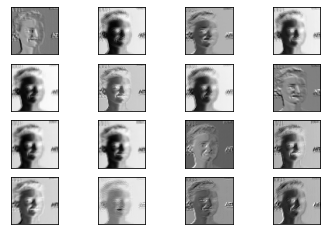

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
None


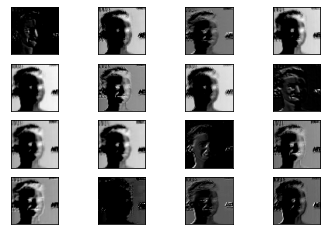

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________
None


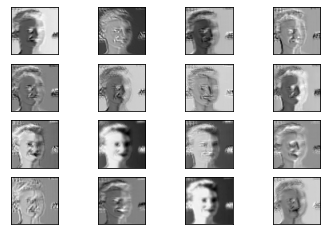

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________
None


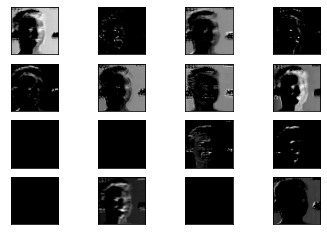

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_______________________________________________________

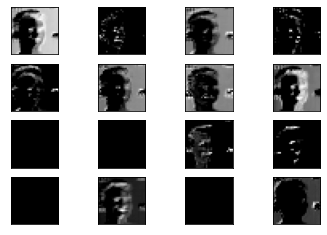

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        1849

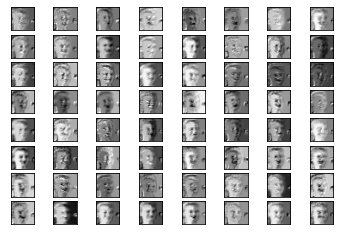

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        1849

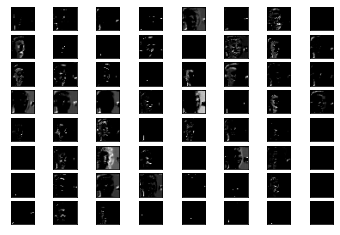

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        1849

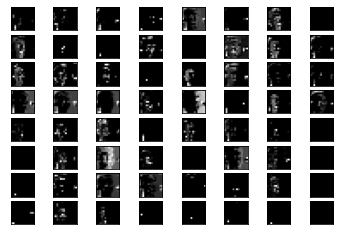

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        1849

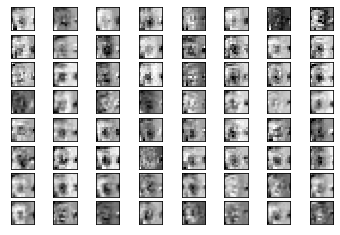

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        1849

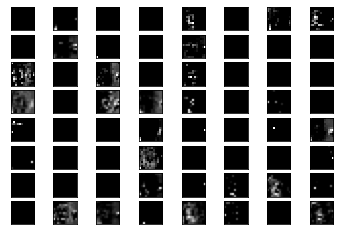

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        184

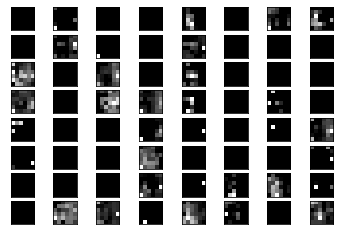

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        184

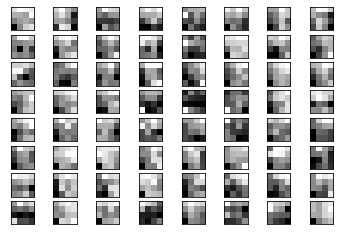

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        184

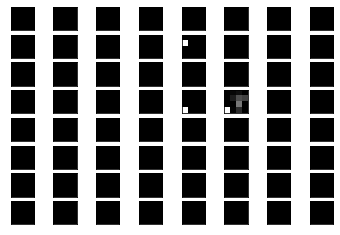

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        184

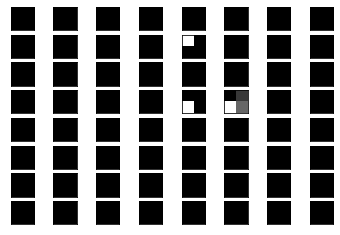

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        184

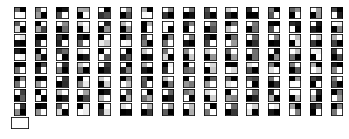

In [0]:
try:
    for layer in Attractive_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs = Attractive_model.inputs, outputs = layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size = (64, 64))
        img = img_to_array(img)
        img = expand_dims(img, axis = 0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

attractive_target = {0: 'unattractive', 1: 'attractive'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Attractive'
    if prediction <= 0.5:
        pred = 'Unattractive'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100, 2))
               , attractive_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_attractive = Attractive_model.predict(ValidImg, verbose = 1) #get all predictions

32/32 [==============================] - 3s 91ms/step



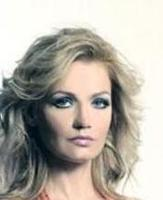

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_attractive[faceIndex]
target = valid.loc[valid.image_id == filename, "Attractive"].item()
display_result(filename, prediction, target)

### ***b) Bald model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Bald.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Bald"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

191069

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((len(ValidSamp), 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((64, 64))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
Bald_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/Best_Bald_model.hdf5")
Bald_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)       

conv2d_2 (3, 3, 3, 32)


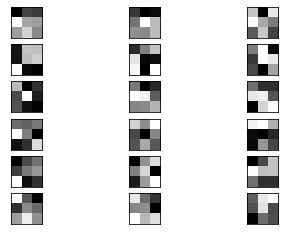

conv2d_3 (3, 3, 32, 32)


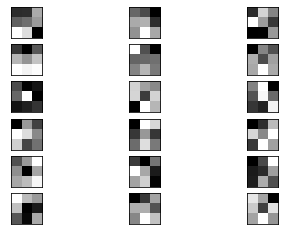

conv2d_4 (3, 3, 32, 32)


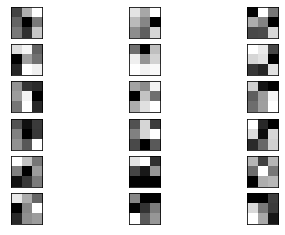

conv2d_5 (3, 3, 32, 64)


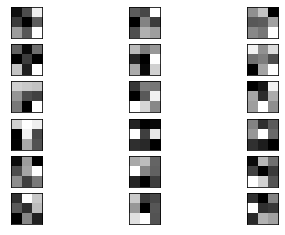

In [0]:
for layer in Bald_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
None


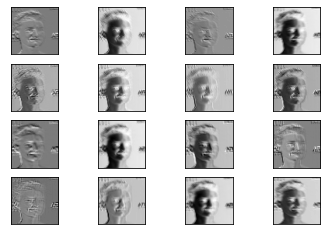

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
None


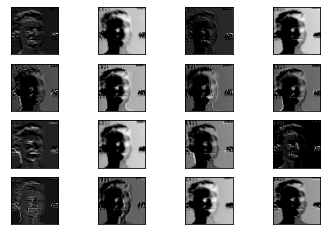

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
None


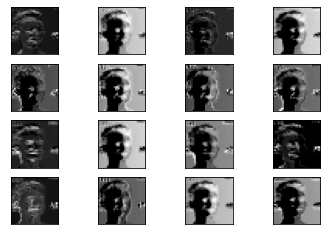

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________
None


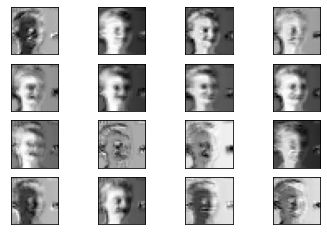

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 29, 29, 32)        0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
______________________________________________________

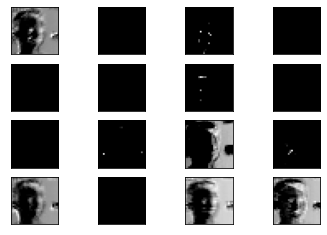

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0  

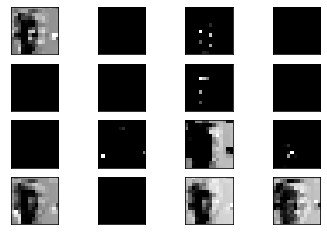

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0  

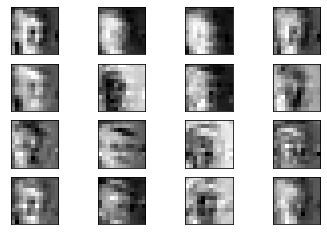

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0  

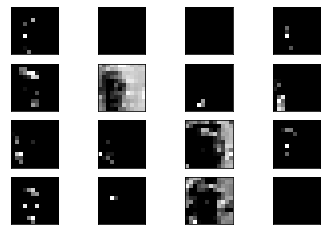

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0  

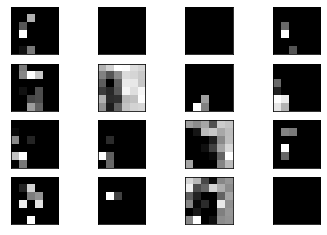

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0  

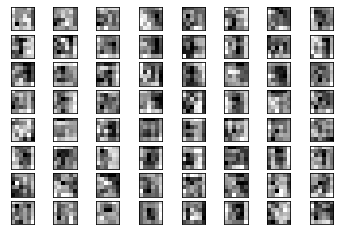

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0  

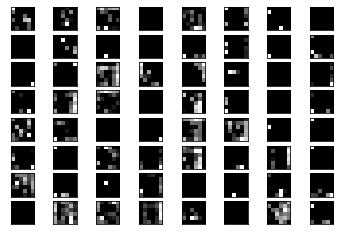

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0  

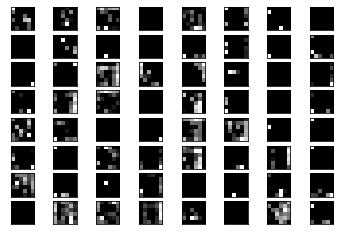

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0  

In [0]:
try:
    for layer in Bald_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs=Bald_model.inputs, outputs=layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size=(64,64))
        img = img_to_array(img)
        img = expand_dims(img, axis=0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

bald_target = {0: 'not bald', 1: 'bald'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Bald'
    if prediction <= 0.5:
        pred = 'Not bald'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100,2))
               , bald_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_bald = Bald_model.predict(ValidImg, verbose = 1) #get all predictions

32/32 [==============================] - 1s 42ms/step



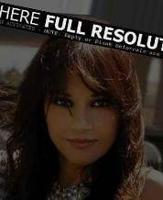

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_bald[faceIndex]
target = valid.loc[valid.image_id == filename, "Bald"].item()
display_result(filename, prediction, target)

### ***c) Black hair model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Black_Hair.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Black_Hair"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

182599

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((1000, 32, 32, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((32,32))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
Black_Hair_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/Best_Black_Hair_model.hdf5")
Black_Hair_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 12, 12, 64)       

conv2d_2 (3, 3, 3, 32)


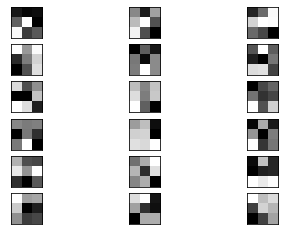

conv2d_3 (3, 3, 32, 32)


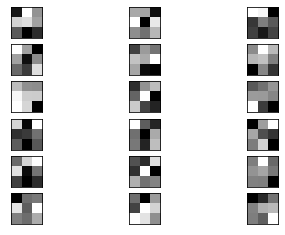

conv2d_4 (3, 3, 32, 64)


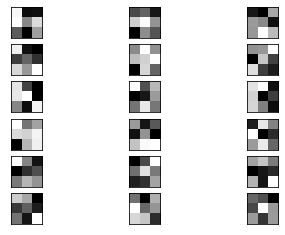

conv2d_5 (3, 3, 64, 128)


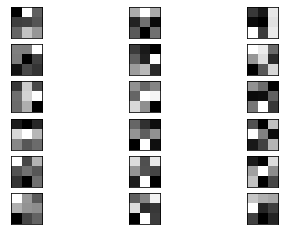

In [0]:
for layer in Black_Hair_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
None


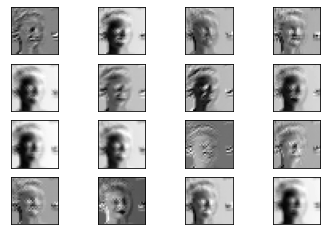

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
None


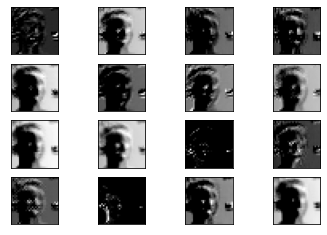

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________
None


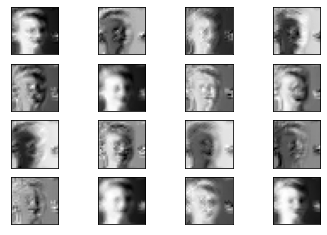

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________
None


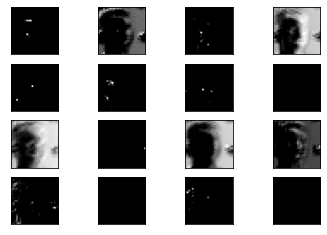

Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
______________________________________________________

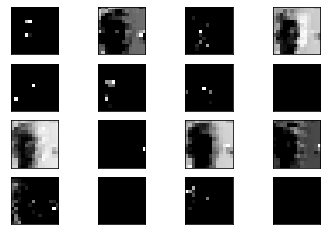

Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        184

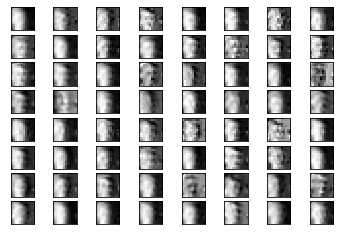

Model: "model_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        184

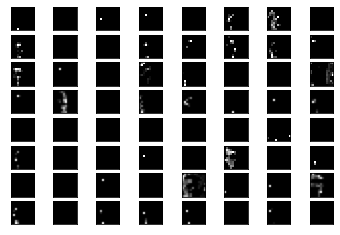

Model: "model_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        184

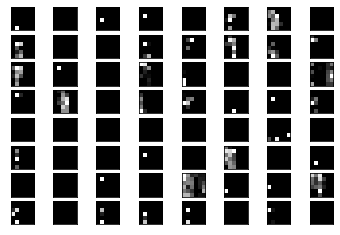

Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        184

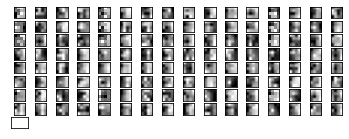

In [0]:
try:
    for layer in Black_Hair_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs=Black_Hair_model.inputs, outputs=layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size=(32,32))
        img = img_to_array(img)
        img = expand_dims(img, axis=0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

black_hair_target = {0: 'hair not black', 1: 'black hair'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Black hair'
    if prediction <= 0.5:
        pred = 'Hair not black'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100,2))
               , black_hair_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_black_hair = Black_Hair_model.predict(ValidImg, verbose = 1) #get all predictions

32/32 [==============================] - 1s 23ms/step



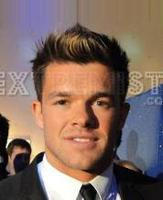

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_black_hair[faceIndex]
target = valid.loc[valid.image_id == filename, "Black_Hair"].item()
display_result(filename, prediction, target)

### ***d) Blond hair model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Blond_Hair.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Blond_Hair"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

182599

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((1000, 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((64, 64))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
Blond_Hair_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/BestModelBlondHair.hdf5")
Blond_Hair_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256)         0     

conv2d (3, 3, 3, 64)


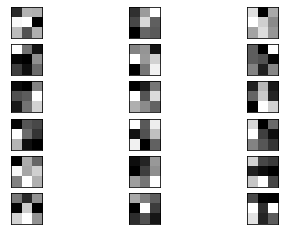

conv2d_1 (3, 3, 64, 128)


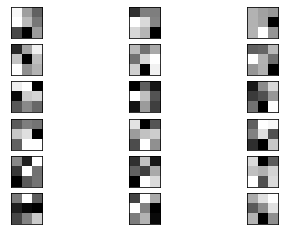

conv2d_2 (3, 3, 128, 256)


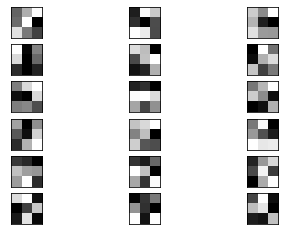

conv2d_3 (3, 3, 256, 512)


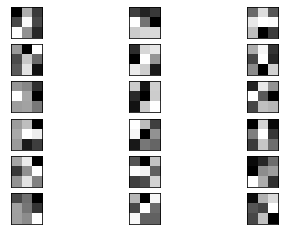

In [0]:
for layer in Blond_Hair_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


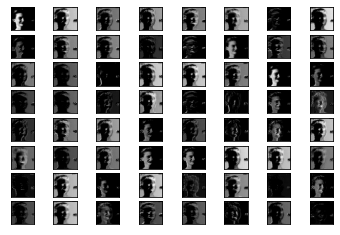

Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


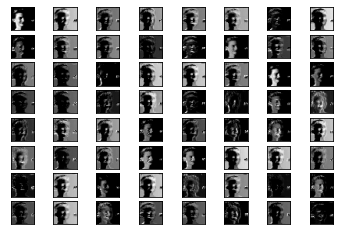

Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________
None
Trop de carrés à plot...


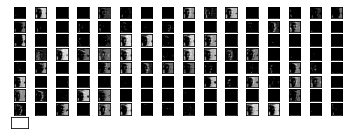

In [0]:
try:
    for layer in Blond_Hair_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs=Blond_Hair_model.inputs, outputs=layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size=(64,64))
        img = img_to_array(img)
        img = expand_dims(img, axis=0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

blond_hair_target = {0: 'hair not blond', 1: 'blond hair'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Blond hair'
    if prediction <= 0.5:
        pred = 'Hair not blond'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100,2))
               , blond_hair_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_blond_hair = Blond_Hair_model.predict(ValidImg, verbose=1) #get all predictions

32/32 [==============================] - 5s 158ms/step



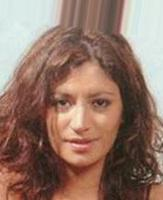

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_blond_hair[faceIndex]
target = valid.loc[valid.image_id == filename, "Blond_Hair"].item()
display_result(filename, prediction, target)

### ***e) Brown hair model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Brown_Hair.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Brown_Hair"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

182599

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((1000, 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((64, 64))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
Brown_Hair_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/BestModelBrownHair.hdf5")
Brown_Hair_model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 256)         0   

conv2d_20 (3, 3, 3, 64)


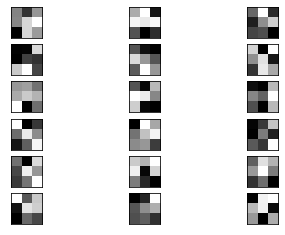

conv2d_21 (3, 3, 64, 128)


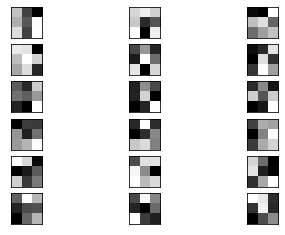

conv2d_22 (3, 3, 128, 256)


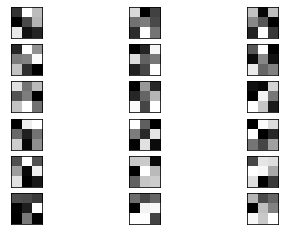

conv2d_23 (3, 3, 256, 512)


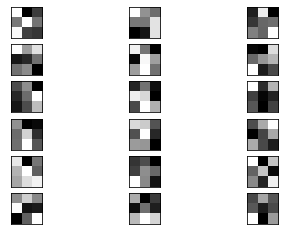

In [0]:
for layer in Brown_Hair_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 64, 64, 3)]       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 62, 62, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


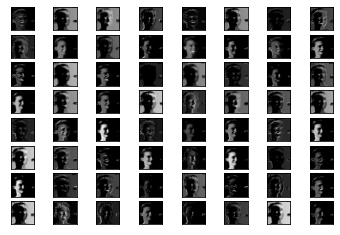

Model: "model_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


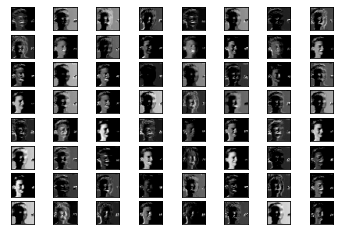

Model: "model_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 29, 29, 128)       73856     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________
None
Trop de carrés à plot...


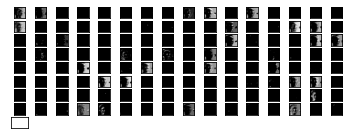

In [0]:
try:
    for layer in Brown_Hair_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs=Brown_Hair_model.inputs, outputs=layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size=(64,64))
        img = img_to_array(img)
        img = expand_dims(img, axis=0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

brown_hair_target = {0: 'hair not brown', 1: 'brown hair'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Brown hair'
    if prediction <= 0.5:
        pred = 'Hair not brown'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100, 2))
               , brown_hair_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_brown_hair = Brown_Hair_model.predict(ValidImg, verbose = 1) #get all predictions

32/32 [==============================] - 5s 157ms/step



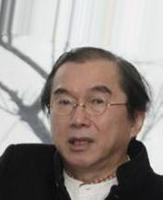

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_brown_hair[faceIndex]
target = valid.loc[valid.image_id == filename, "Brown_Hair"].item()
display_result(filename, prediction, target)

### ***f) Eyeglass model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Eyeglasses.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Eyeglasses"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

182599

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((1000, 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((64, 64))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
Eyeglasses_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/BestModelEyeglasses.hdf5")
Eyeglasses_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256)         0     

conv2d (3, 3, 3, 64)


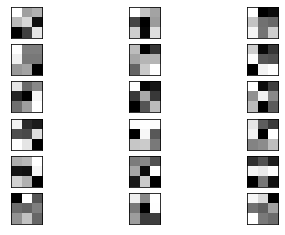

conv2d_1 (3, 3, 64, 128)


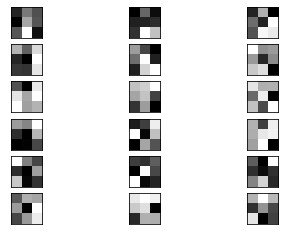

conv2d_2 (3, 3, 128, 256)


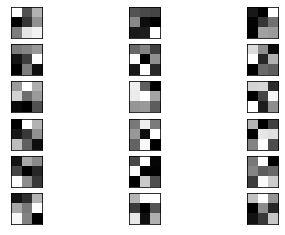

conv2d_3 (3, 3, 256, 512)


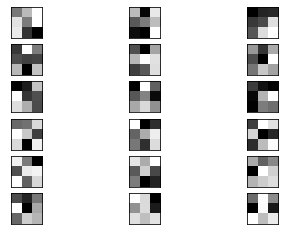

In [0]:
for layer in Eyeglasses_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap = 'gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


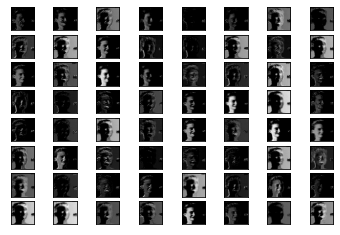

Model: "model_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


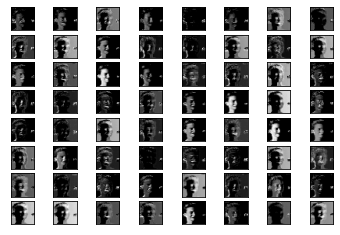

Model: "model_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________
None
Trop de carrés à plot...


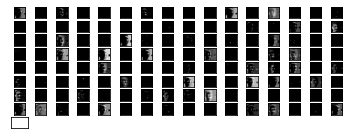

In [0]:
try:
    for layer in Eyeglasses_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs=Eyeglasses_model.inputs, outputs=layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size=(64, 64))
        img = img_to_array(img)
        img = expand_dims(img, axis = 0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

eyeglasses_target = {0: 'no eyeglasses', 1: 'eyeglasses'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Eyeglasses'
    if prediction <= 0.5:
        pred = 'No eyeglasses'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100, 2))
               , eyeglasses_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_eyeglasses = Eyeglasses_model.predict(ValidImg, verbose = 1) #get all predictions

32/32 [==============================] - 5s 159ms/step



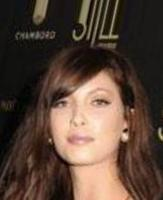

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_eyeglasses[faceIndex]
target = valid.loc[valid.image_id == filename, "Eyeglasses"].item()
display_result(filename, prediction, target)

### ***g) Grey hair model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Gray_Hair.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Gray_Hair"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

184100

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((1000, 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((64, 64))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 

0
100
200
300
400
500
600
700
800
900


In [0]:
Gray_Hair_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/BestModelGrayHair.hdf5")
Gray_Hair_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 256)         0   

conv2d_4 (3, 3, 3, 64)


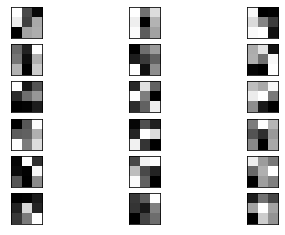

conv2d_5 (3, 3, 64, 128)


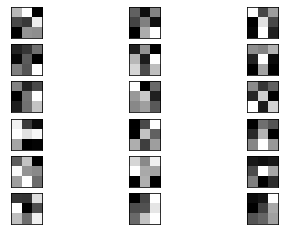

conv2d_6 (3, 3, 128, 256)


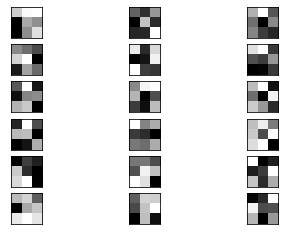

conv2d_7 (3, 3, 256, 512)


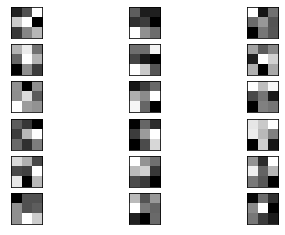

In [0]:
for layer in Gray_Hair_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap = 'gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


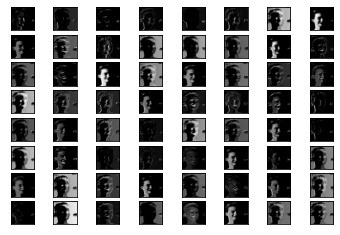

Model: "model_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


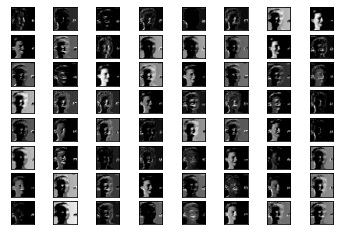

Model: "model_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 128)       73856     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________
None
Trop de carrés à plot...


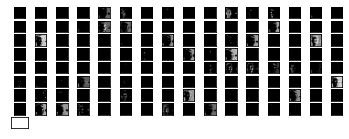

In [0]:
try:
    for layer in Gray_Hair_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs = Gray_Hair_model.inputs, outputs=layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size = (64, 64))
        img = img_to_array(img)
        img = expand_dims(img, axis = 0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

gray_hair_target = {0: 'hair not gray', 1: 'gray hair'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Gray hair'
    if prediction <= 0.5:
        pred = 'Hair not gray'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100, 2))
               , gray_hair_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_gray_hair = Gray_Hair_model.predict(ValidImg, verbose = 1) #get all predictions

32/32 [==============================] - 5s 160ms/step



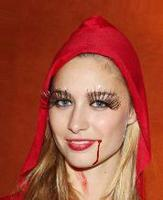

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_gray_hair[faceIndex]
target = valid.loc[valid.image_id == filename, "Gray_Hair"].item()
display_result(filename, prediction, target)

### ***h) Male model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Male.pkl', 'rb'))
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Male.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Male"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

182599

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((1000, 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((64, 64))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
Male_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/Male.hdf5")
Male_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

conv2d_2 (3, 3, 3, 64)


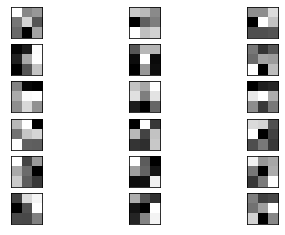

conv2d_3 (3, 3, 64, 128)


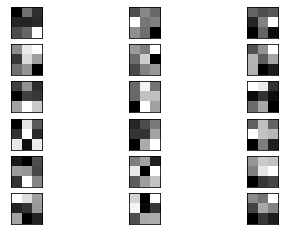

In [0]:
for layer in Male_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap = 'gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


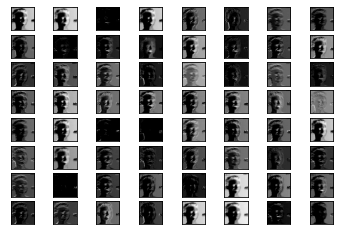

Model: "model_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


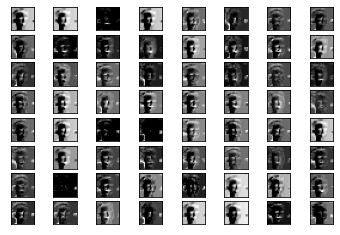

Model: "model_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 20, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


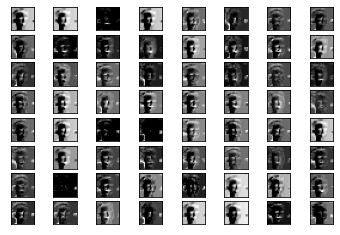

Model: "model_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       73856     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________
None
Trop de carrés à plot...


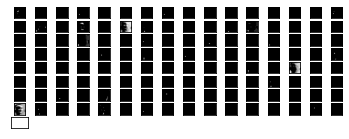

In [0]:
try:
    for layer in Male_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs = Male_model.inputs, outputs = layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size = (64, 64))
        img = img_to_array(img)
        img = expand_dims(img, axis = 0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

male_target = {0: 'woman', 1: 'man'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Man'
    if prediction <= 0.5:
        pred = 'Woman'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100, 2))
               , male_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_male = Male_model.predict(ValidImg, verbose = 1) #get all predictions

32/32 [==============================] - 2s 64ms/step



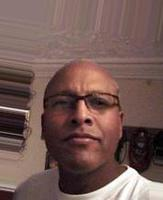

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_male[faceIndex]
target = valid.loc[valid.image_id == filename, "Male"].item()
display_result(filename, prediction, target)

### ***i) Mustache model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Mustache.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Mustache"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

184182

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((1000, 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path+file)
    image = image.resize((64, 64))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
Mustache_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/Mustache.hdf5")
Mustache_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 18, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

conv2d_18 (3, 3, 3, 64)


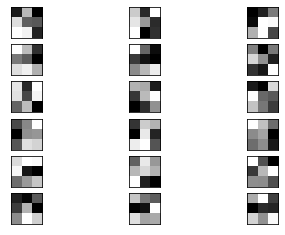

conv2d_19 (3, 3, 64, 128)


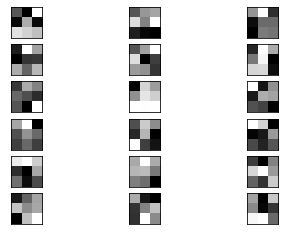

conv2d_20 (3, 3, 128, 256)


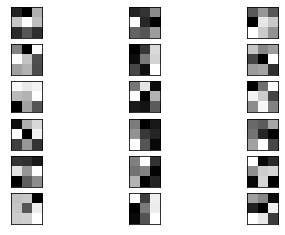

In [0]:
for layer in Mustache_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap = 'gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18_input (InputLayer) [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 62, 62, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


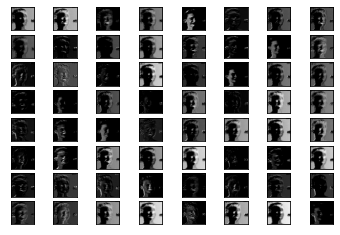

Model: "model_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18_input (InputLayer) [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 20, 20, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


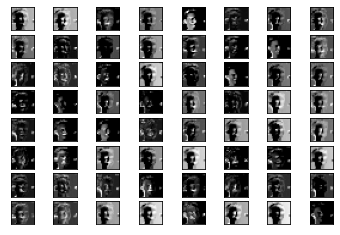

Model: "model_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18_input (InputLayer) [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 18, 18, 128)       73856     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________
None
Trop de carrés à plot...


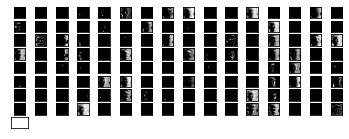

In [0]:
try:
    for layer in Mustache_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs = Mustache_model.inputs, outputs = layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size = (64, 64))
        img = img_to_array(img)
        img = expand_dims(img, axis = 0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

mustache_target = {0: 'no mustache', 1: 'mustache'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Mustache'
    if prediction <= 0.5:
        pred = 'No mustache'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100, 2))
               , mustache_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_mustache = Mustache_model.predict(ValidImg, verbose = 1) #get all predictions

32/32 [==============================] - 2s 60ms/step



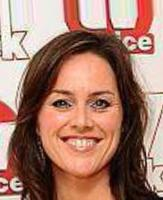

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_mustache[faceIndex]
target = valid.loc[valid.image_id == filename, "Mustache"].item()
display_result(filename, prediction, target)

### ***j) No beard model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/No_Beard.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "No_Beard"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

182599

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((1000, 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((64, 64))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
No_Beard_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/No_beard.hdf5")
No_Beard_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

conv2d_4 (3, 3, 3, 64)


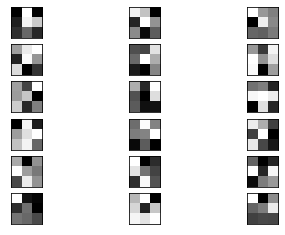

conv2d_5 (3, 3, 64, 128)


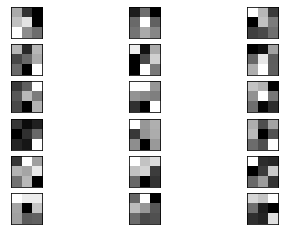

conv2d_6 (3, 3, 128, 256)


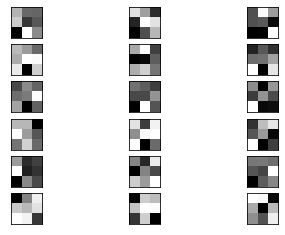

In [0]:
for layer in No_Beard_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap = 'gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


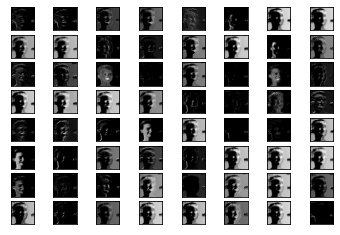

Model: "model_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


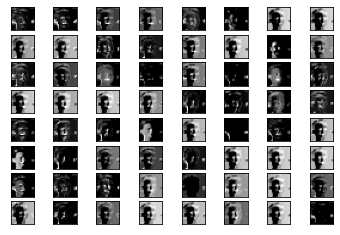

Model: "model_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 128)       73856     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________
None
Trop de carrés à plot...


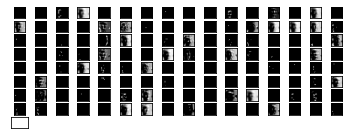

In [0]:
try:
    for layer in No_Beard_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs = No_Beard_model.inputs, outputs = layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size = (64, 64))
        img = img_to_array(img)
        img = expand_dims(img, axis = 0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

no_beard_target = {0: 'beard', 1: 'no beard'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'No beard'
    if prediction <= 0.5:
        pred = 'Beard'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100, 2))
               , no_beard_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_no_beard = No_Beard_model.predict(ValidImg, verbose = 1) #get all predictions

32/32 [==============================] - 2s 60ms/step



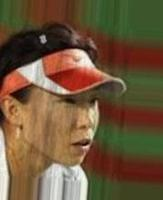

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_no_beard[faceIndex]
target = valid.loc[valid.image_id == filename, "No_Beard"].item()
display_result(filename, prediction, target)
# les pred sont chelous quelqu'uns pourra regarder, je comprend pas...

### ***k) Pale skin model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Pale_Skin.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Pale_Skin"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

183898

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((1000, 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((64, 64))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
Pale_Skin_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/PaleSkin.hdf5")
Pale_Skin_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 350)         403550    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 350)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 350)              

conv2d_9 (3, 3, 3, 64)


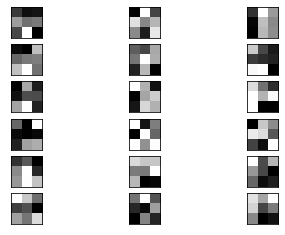

conv2d_10 (3, 3, 64, 128)


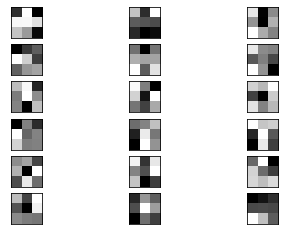

conv2d_11 (3, 3, 128, 350)


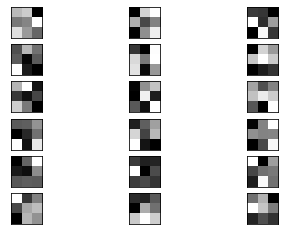

In [0]:
for layer in Pale_Skin_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap = 'gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 62, 62, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


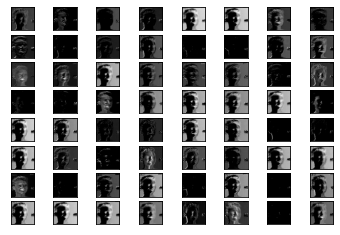

Model: "model_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 20, 20, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


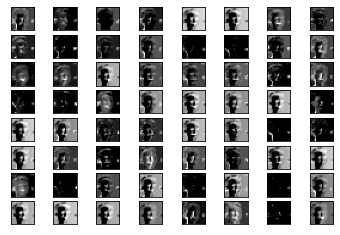

Model: "model_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 18, 128)       73856     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________
None
Trop de carrés à plot...


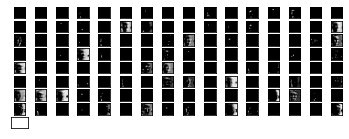

In [0]:
try:
    for layer in Pale_Skin_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs = Pale_Skin_model.inputs, outputs = layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size = (64, 64))
        img = img_to_array(img)
        img = expand_dims(img, axis = 0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

pale_skin_target = {0: 'skin not pale', 1: 'pale skin'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Pale skin'
    if prediction <= 0.5:
        pred = 'Skin not pale'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100, 2))
               , pale_skin_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_pale_skin = Pale_Skin_model.predict(ValidImg, verbose = 1) #get all predictions

32/32 [==============================] - 2s 61ms/step



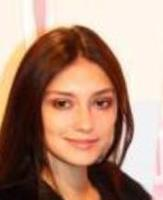

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_pale_skin[faceIndex]
target = valid.loc[valid.image_id == filename, "Pale_Skin"].item()
display_result(filename, prediction, target)

### ***l) Smiling model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Smiling.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Smiling"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

182599

In [0]:
attr = pd.read_csv('/content/img/list_landmarks_align_celeba.csv')
attr = attr[['image_id','leftmouth_x','leftmouth_y','rightmouth_x','rightmouth_y']]
coord = attr.loc[attr[attr['image_id'].isin(samp) == False].index]
coord = coord.set_index('image_id')

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
data_upper = np.zeros((NbImg, 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    
    separation = min(coord.leftmouth_y.loc[file],
                     coord.rightmouth_y.loc[file])-10
    image = image.crop((0, 0, 178, separation))
    image = image.resize((64, 64))
    image = np.array(image)
    data_upper[count] = image
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
data_under = np.zeros((NbImg, 64, 64, 3)) #dimension of the images
count = 0
for file in IndexValidImg :
    image = Image.open(path + file)
    separation = min(coord.leftmouth_y.loc[file],
                    coord.rightmouth_y.loc[file])-10
    image = image.crop((0, separation, 178, 218))
    image = image.resize((64,64))
    data_under[count] = np.array(image)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
Smiling_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/Smiling.hdf5")
Smiling_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
upper_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 62, 62, 64)   1792        under_input[0][0]                
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 62, 62, 64)   1792        upper_input[0][0]                
______________________________________________________________________________________________

conv2d (3, 3, 3, 64)


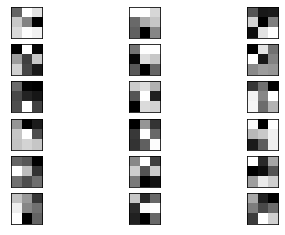

conv2d_4 (3, 3, 3, 64)


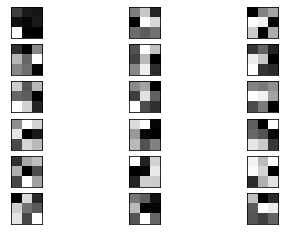

conv2d_1 (3, 3, 64, 128)


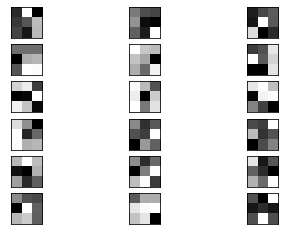

conv2d_5 (3, 3, 64, 128)


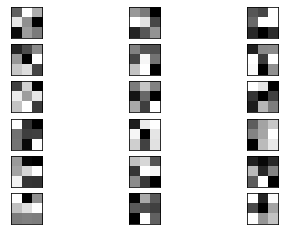

conv2d_2 (3, 3, 128, 256)


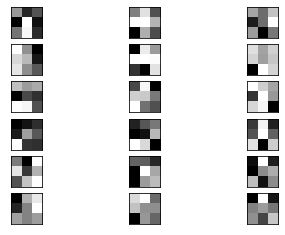

conv2d_6 (3, 3, 128, 256)


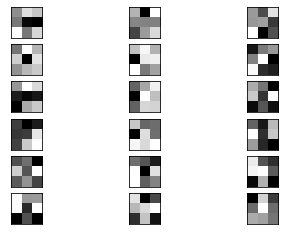

conv2d_3 (3, 3, 256, 512)


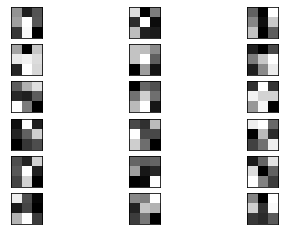

conv2d_7 (3, 3, 256, 512)


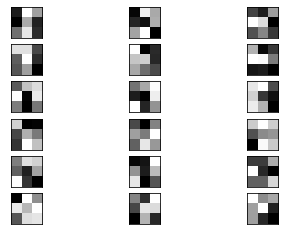

In [0]:
for layer in Smiling_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap = 'gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_66"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
upper_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________
None
Model: "model_67"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
________

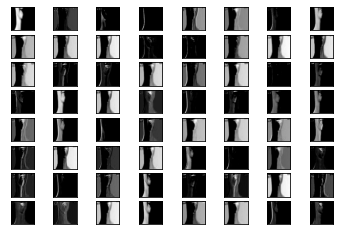

Model: "model_69"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
upper_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 62, 62, 64)   1792        upper_input[0][0]                
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
__________________________________________________________________________________________________
None


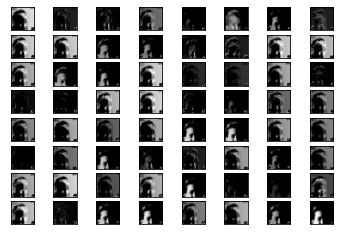

Model: "model_70"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 62, 62, 64)   1792        under_input[0][0]                
__________________________________________________________________________________________________
upper_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 31, 31, 64)   0           conv2d[0][0]                     
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_______________________

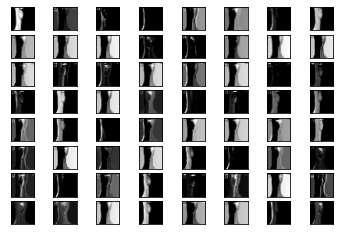

Model: "model_71"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
upper_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 62, 62, 64)   1792        upper_input[0][0]                
__________________________________________________________________________________________________
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 31, 31, 64)   0           conv2d_4[0][0]                   
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_______________________

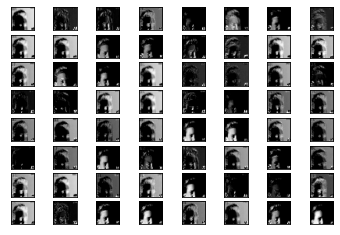

Model: "model_72"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 62, 62, 64)   1792        under_input[0][0]                
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 31, 31, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
upper_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
___________________________________________________________________________________________

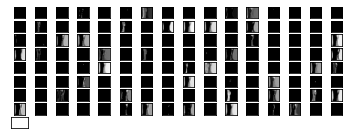

In [0]:
try:
    for layer in Smiling_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs = Smiling_model.inputs, outputs = layer.output)
        print(TempModel.summary())
        img = load_img(ex_img)
        img = Image.open(ex_img)
        separation = min(coord.leftmouth_y.loc[ex_img[-10:]],
                    coord.rightmouth_y.loc[ex_img[-10:]])-10

        upper = img.crop((0, 0, 178, separation))
        under = img.crop((0, separation, 178, 218))

        upper = upper.resize((64, 64))
        under = under.resize((64, 64))

        upper = img_to_array(upper)
        under = img_to_array(under)
        
        upper = expand_dims(upper, axis = 0)
        under = expand_dims(under, axis = 0)        # expand dimensions so that it represents a single 'sample'
        
        upper = preprocess_input(upper)           # prepare the image (e.g. scale pixel values...)
        under = preprocess_input(under) 
        
        feature_maps = TempModel.predict({'under_input': under, 
                                          'upper_input': upper}) # get feature map foreach hidden layer
                                          
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

smiling_target = {0: 'not smiling', 1: 'smiling'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Smiling'
    if prediction <= 0.5:
        pred = 'Not smiling'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100, 2))
               , smiling_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_smiling = Smiling_model.predict({'under_input': data_under, 
                                      'upper_input': data_upper}, verbose = 1) #get all predictions

32/32 [==============================] - 11s 334ms/step


In [0]:
data_under.shape

(1000, 64, 64, 3)

In [0]:
data_upper.shape

(1000, 64, 64, 3)


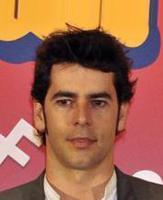

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_smiling[faceIndex]
target = valid.loc[valid.image_id == filename, "Smiling"].item()
display_result(filename, prediction, target)

### ***m) Straight hair model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Straight_Hair.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Straight_Hair"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

182599

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((1000, 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((64, 64))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1
    

0
100
200
300
400
500
600
700
800
900


In [0]:
Straight_Hair_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/Straight_Hair.hdf5")
Straight_Hair_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       2

conv2d (3, 3, 3, 64)


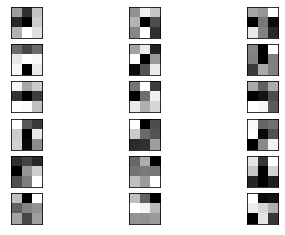

conv2d_1 (3, 3, 64, 128)


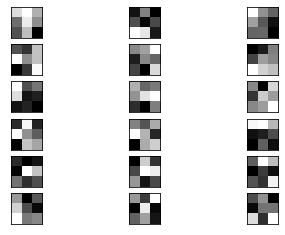

conv2d_2 (3, 3, 128, 256)


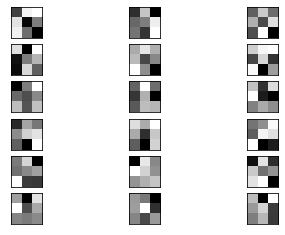

conv2d_3 (3, 3, 256, 512)


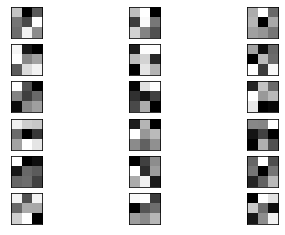

In [0]:
for layer in Straight_Hair_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap = 'gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


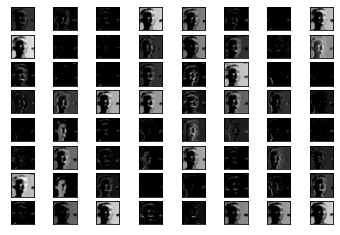

Model: "model_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


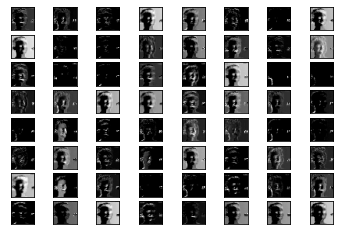

Model: "model_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


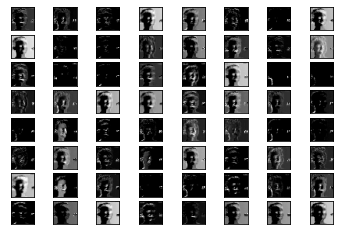

Model: "model_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________
None
Trop de carrés à plot...


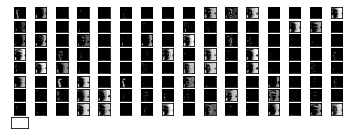

In [0]:
try:
    for layer in Straight_Hair_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs = Straight_Hair_model.inputs, outputs = layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size = (64, 64))
        img = img_to_array(img)
        img = expand_dims(img, axis = 0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

straight_hair_target = {0: 'hair not straight', 1: 'straight hair'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Straight hair'
    if prediction <= 0.5:
        pred = 'Hair not straight'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100, 2))
               , straight_hair_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_straight_hair = Straight_Hair_model.predict(ValidImg, verbose = 1) #get all predictions

32/32 [==============================] - 5s 164ms/step



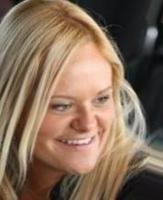

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_straight_hair[faceIndex]
target = valid.loc[valid.image_id == filename, "Straight_Hair"].item()
display_result(filename, prediction, target)

### ***n) Wavy hair model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Wavy_Hair.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Wavy_Hair"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

182599

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
ValidImg = np.zeros((1000, 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((64, 64))
    ValidImg[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
Wavy_Hair_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/Wavy_Hair.hdf5")
Wavy_Hair_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       2

conv2d (3, 3, 3, 64)


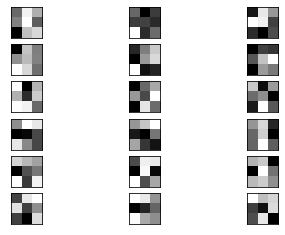

conv2d_1 (3, 3, 64, 128)


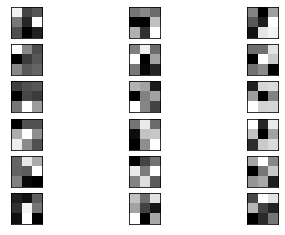

conv2d_2 (3, 3, 128, 256)


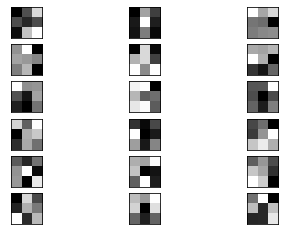

conv2d_3 (3, 3, 256, 512)


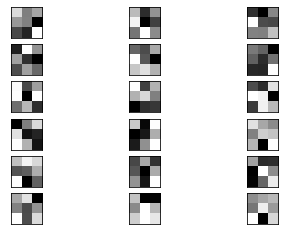

In [0]:
for layer in Wavy_Hair_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap = 'gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


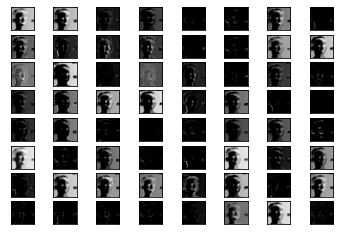

Model: "model_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


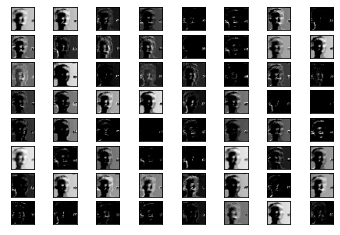

Model: "model_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


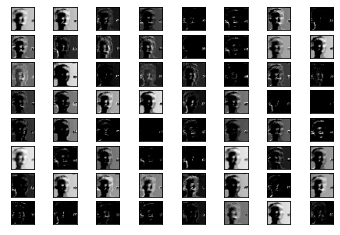

Model: "model_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________
None
Trop de carrés à plot...


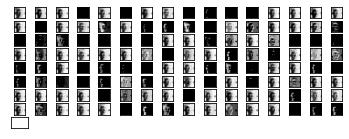

In [0]:
try:
    for layer in Wavy_Hair_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs = Wavy_Hair_model.inputs, outputs = layer.output)
        print(TempModel.summary())
        img = load_img(ex_img, target_size = (64, 64))
        img = img_to_array(img)
        img = expand_dims(img, axis = 0)        # expand dimensions so that it represents a single 'sample'
        img = preprocess_input(img)           # prepare the image (e.g. scale pixel values...)
        feature_maps = TempModel.predict(img) # get feature map foreach hidden layer
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

wavy_hair_target = {0: 'hair not wavy', 1: 'wavy hair'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Wavy hair'
    if prediction <= 0.5:
        pred = 'Hair not wavy'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100, 2))
               , wavy_hair_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_wavy_hair = Wavy_Hair_model.predict(ValidImg, verbose = 1) #get all predictions

32/32 [==============================] - 5s 166ms/step



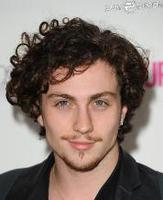

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_wavy_hair[faceIndex]
target = valid.loc[valid.image_id == filename, "Wavy_Hair"].item()
display_result(filename, prediction, target)

### ***o) Young model***

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
samp = pickle.load(open ('/content/drive/My Drive/Big Data/Projet/Listes sample/Young.pkl', 'rb'))
valid = df_attr.loc[df_attr.image_id.isin(samp) == False, ["image_id", "Young"]]
ValidImg = valid.image_id.tolist()
len(ValidImg)

182599

In [0]:
attr = pd.read_csv('/content/img/list_landmarks_align_celeba.csv')
attr = attr[['image_id','leftmouth_x','leftmouth_y','rightmouth_x','rightmouth_y']]
coord = attr.loc[attr[attr['image_id'].isin(samp) == False].index]
coord = coord.set_index('image_id')

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
IndexValidImg = []
data_upper = np.zeros((NbImg, 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    
    separation = min(coord.leftmouth_y.loc[file],
                    coord.rightmouth_y.loc[file])-10
    image = image.crop((0, 0, 178, separation))
    image = image.resize((64, 64))
    image = np.array(image)
    data_upper[count] = image
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
data_under = np.zeros((NbImg, 64, 64, 3)) #dimension of the images
count = 0
for file in IndexValidImg :
    image = Image.open(path + file)
    separation = min(coord.leftmouth_y.loc[file],
                    coord.rightmouth_y.loc[file])-10
    image = image.crop((0, separation, 178, 218))
    image = image.resize((64, 64))
    data_under[count] = np.array(image)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
Young_model = load_model("/content/drive/My Drive/Big Data/Projet/Models/Young.hdf5")
Young_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
upper_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 62, 62, 64)   1792        under_input[0][0]                
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 62, 62, 64)   1792        upper_input[0][0]                
______________________________________________________________________________________________

conv2d (3, 3, 3, 64)


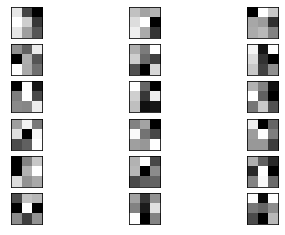

conv2d_4 (3, 3, 3, 64)


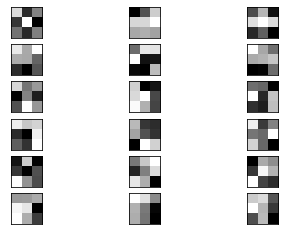

conv2d_1 (3, 3, 64, 128)


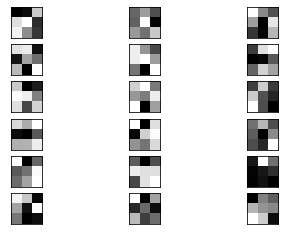

conv2d_5 (3, 3, 64, 128)


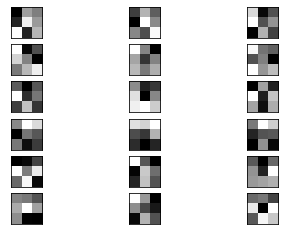

conv2d_2 (3, 3, 128, 256)


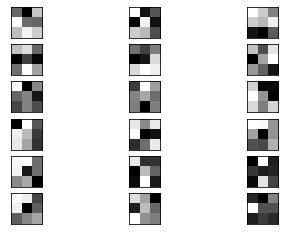

conv2d_6 (3, 3, 128, 256)


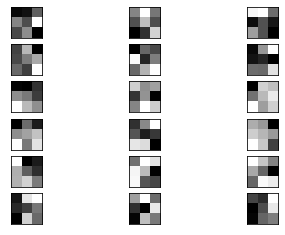

conv2d_3 (3, 3, 256, 512)


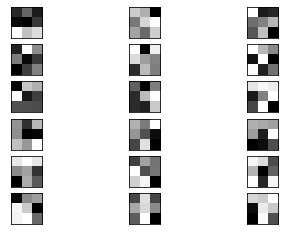

conv2d_7 (3, 3, 256, 512)


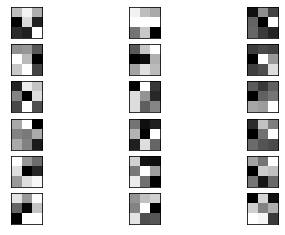

In [0]:
for layer in Young_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(layer.name, filters.shape)
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap = 'gray')
            ix += 1
    # show the figure
    plt.show()

Model: "model_81"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
upper_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________
None
Model: "model_82"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
________

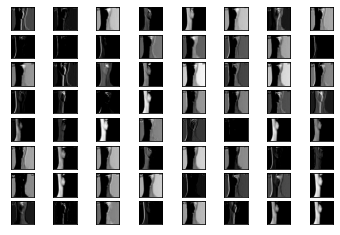

Model: "model_84"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
upper_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 62, 62, 64)   1792        upper_input[0][0]                
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
__________________________________________________________________________________________________
None


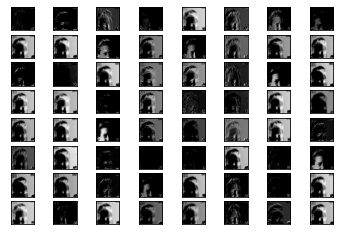

Model: "model_85"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 62, 62, 64)   1792        under_input[0][0]                
__________________________________________________________________________________________________
upper_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 31, 31, 64)   0           conv2d[0][0]                     
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_______________________

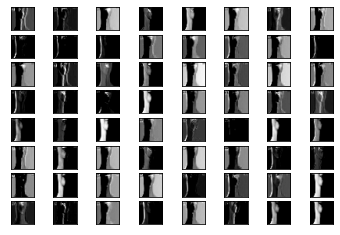

Model: "model_86"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
upper_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 62, 62, 64)   1792        upper_input[0][0]                
__________________________________________________________________________________________________
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 31, 31, 64)   0           conv2d_4[0][0]                   
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_______________________

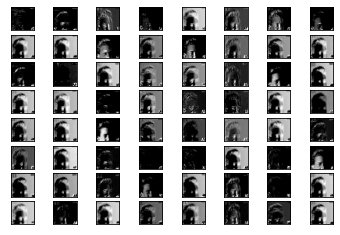

Model: "model_87"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
under_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 62, 62, 64)   1792        under_input[0][0]                
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 31, 31, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
upper_input (InputLayer)        [(None, 64, 64, 3)]  0                                            
___________________________________________________________________________________________

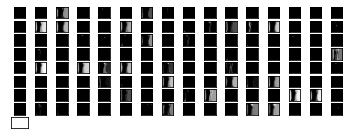

In [0]:
try:
    for layer in Young_model.layers[:-1]:           # on plot les filtres de chaque layer sauf le dernier (pb de dim)
        TempModel = Model(inputs = Young_model.inputs, outputs = layer.output)
        print(TempModel.summary())
        img = load_img(ex_img)
        img = Image.open(ex_img)
        separation = min(coord.leftmouth_y.loc[ex_img[-10:]],
                    coord.rightmouth_y.loc[ex_img[-10:]])-10

        upper = img.crop((0, 0, 178, separation))
        under = img.crop((0, separation, 178, 218))

        upper = upper.resize((64, 64))
        under = under.resize((64, 64))

        upper = img_to_array(upper)
        under = img_to_array(under)
        
        upper = expand_dims(upper, axis = 0)
        under = expand_dims(under, axis = 0)        # expand dimensions so that it represents a single 'sample'
        
        upper = preprocess_input(upper)           # prepare the image (e.g. scale pixel values...)
        under = preprocess_input(under) 
        
        feature_maps = TempModel.predict({'under_input': under, 
                                          'upper_input': upper}) # get feature map foreach hidden layer
                                          
        square = int(layer.output.shape[3]/8) # plot a square that adujuts it size to the number of maps
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
                ix += 1
        # show the figure
        plt.show()
except (ValueError, IndexError):
    print("Trop de carrés à plot...")

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

young_target = {0: 'old', 1: 'young'}

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    pred = 'Young'
    if prediction <= 0.5:
        pred = 'Old'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
            <br>
            <p style="margin-left: 30px; margin-top: -6px; font-size: 12px">{} prob.</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <br>
            <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , pred
               , "{0:.2f}%".format(round(max(prediction)*100, 2))
               , young_target[target]
               , filename
               )

    display(HTML(display_html))

In [0]:
pred_young = Young_model.predict({'under_input': data_under, 
                                  'upper_input': data_upper}, verbose=1) #get all predictions

32/32 [==============================] - 11s 335ms/step


In [0]:
data_under.shape

(1000, 64, 64, 3)

In [0]:
data_upper.shape

(1000, 64, 64, 3)


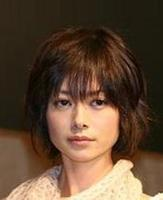

In [0]:
faceIndex = np.random.choice(len(IndexValidImg), 1)[0]
filename = IndexValidImg[faceIndex]
prediction = pred_young[faceIndex]
target = valid.loc[valid.image_id == filename, "Young"].item()
display_result(filename, prediction, target)

## **4. Final results**


In [0]:
samp_Attractive     = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Attractive.pkl", 'rb'))
samp_Bald           = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Bald.pkl", 'rb'))
samp_Black_Hair     = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Black_Hair.pkl", 'rb'))
samp_Blond_Hair     = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Blond_Hair.pkl", 'rb'))
samp_Brown_Hair     = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Brown_Hair.pkl", 'rb'))
samp_Eyeglasses     = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Eyeglasses.pkl", 'rb'))
samp_Gray_Hair      = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Gray_Hair.pkl", 'rb'))
samp_Male           = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Male.pkl", 'rb'))
samp_Mustache       = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Mustache.pkl", 'rb'))
samp_No_Beard       = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/No_Beard.pkl", 'rb'))
samp_Pale_Skin      = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Pale_Skin.pkl", 'rb'))
samp_Smiling        = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Smiling.pkl", 'rb'))
samp_Straight_Hair  = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Straight_Hair.pkl", 'rb'))
samp_Wavy_Hair      = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Wavy_Hair.pkl", 'rb'))
samp_Young          = pickle.load(open("/content/drive/My Drive/Big Data/Projet/Listes sample/Young.pkl", 'rb'))

In [0]:
samples = [samp_Attractive, samp_Bald, samp_Black_Hair, samp_Blond_Hair, samp_Brown_Hair, samp_Eyeglasses,
           samp_Gray_Hair, samp_Male, samp_Mustache, samp_No_Beard, samp_Pale_Skin, samp_Smiling, samp_Straight_Hair,
           samp_Wavy_Hair, samp_Young]
len(samples)

15

In [0]:
import itertools
ImgOutOfValid = list(itertools.chain.from_iterable(samples))
ImgOutOfValid = list(set(ImgOutOfValid))
len(ImgOutOfValid)

155029

In [0]:
df_attr = pd.read_csv('/content/img/list_attr_celeba.csv')
df_attr.replace(to_replace = -1, value = 0, inplace = True)
valid = df_attr.loc[df_attr.image_id.isin(ImgOutOfValid) == False]
ValidImg = valid.image_id.tolist()
len(ValidImg)

47570

In [0]:
random.seed(1)
NbImg = 1000
ValidSamp = random.sample(ValidImg, NbImg)
len(ValidSamp)

1000

In [0]:
path = '/content/img/img_align_celeba/img_align_celeba/'
IndexValidImg64 = []
ValidImg64 = np.zeros((len(ValidSamp), 64, 64, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((64, 64))
    ValidImg64[count] = np.array(image)
    IndexValidImg64.append(file)
    if count%100 == 0 :
      print(count)
    count += 1
    

0
100
200
300
400
500
600
700
800
900


In [0]:
IndexValidImg32 = []
ValidImg32 = np.zeros((len(ValidSamp), 32, 32, 3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    image = image.resize((32, 32))
    ValidImg32[count] = np.array(image)
    IndexValidImg32.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
df_landmarks = pd.read_csv('/content/img/list_landmarks_align_celeba.csv')
df_landmarks = df_landmarks[['image_id','leftmouth_x','leftmouth_y',
                             'rightmouth_x','rightmouth_y']]
coord = df_landmarks.loc[df_landmarks[df_landmarks['image_id'].isin(ImgOutOfValid)==False].index]
coord = coord.set_index('image_id')

In [0]:
IndexValidImg = []
ValidImgUpper = np.zeros((len(ValidSamp), 64, 64,3)) #dimension of the images
count = 0
for file in os.listdir(path) :
  if file in ValidSamp :
    image = Image.open(path + file)
    
    separation = min(coord.leftmouth_y.loc[file],
                     coord.rightmouth_y.loc[file])-10
    image = image.crop((0, 0, 178, separation))
    image = image.resize((64, 64))
    ValidImgUpper[count] = np.array(image)
    IndexValidImg.append(file)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
ValidImgUnder = np.zeros((len(ValidSamp), 64, 64, 3)) #dimension of the images
count = 0
for file in IndexValidImg :
    image = Image.open(path + file)
    separation = min(coord.leftmouth_y.loc[file],
                     coord.rightmouth_y.loc[file])-10
    image = image.crop((0, separation, 178, 218))
    image = image.resize((64,64))
    ValidImgUnder[count] = np.array(image)
    if count%100 == 0 :
      print(count)
    count += 1

0
100
200
300
400
500
600
700
800
900


In [0]:
assert IndexValidImg64 == IndexValidImg32 == IndexValidImg

In [0]:
faceIndex = np.random.choice(len(IndexValidImg64), 1)[0]
filename = IndexValidImg64[faceIndex]

In [0]:
model_Attractive    = load_model("/content/drive/My Drive/Big Data/Projet/Models/Best_Attractive_model.hdf5")
model_Bald          = load_model("/content/drive/My Drive/Big Data/Projet/Models/Best_Bald_model.hdf5")
model_Black_Hair    = load_model("/content/drive/My Drive/Big Data/Projet/Models/Best_Black_Hair_model.hdf5")
model_Blond_Hair    = load_model("/content/drive/My Drive/Big Data/Projet/Models/BestModelBlondHair.hdf5")
model_Brown_Hair    = load_model("/content/drive/My Drive/Big Data/Projet/Models/BestModelBrownHair.hdf5")
model_Eyeglasses    = load_model("/content/drive/My Drive/Big Data/Projet/Models/BestModelEyeglasses.hdf5")
model_Gray_Hair     = load_model("/content/drive/My Drive/Big Data/Projet/Models/BestModelGrayHair.hdf5")
model_Male          = load_model("/content/drive/My Drive/Big Data/Projet/Models/Male.hdf5")
model_Mustache      = load_model("/content/drive/My Drive/Big Data/Projet/Models/Mustache.hdf5")
model_No_Beard      = load_model("/content/drive/My Drive/Big Data/Projet/Models/No_beard.hdf5")
model_Pale_Skin     = load_model("/content/drive/My Drive/Big Data/Projet/Models/PaleSkin.hdf5")
model_Smiling       = load_model("/content/drive/My Drive/Big Data/Projet/Models/Smiling.hdf5")
model_Straight_Hair = load_model("/content/drive/My Drive/Big Data/Projet/Models/Straight_Hair.hdf5")
model_Wavy_Hair     = load_model("/content/drive/My Drive/Big Data/Projet/Models/Wavy_Hair.hdf5")
model_Young         = load_model("/content/drive/My Drive/Big Data/Projet/Models/Young.hdf5")

In [0]:
pred_Attractive     = model_Attractive.predict(ValidImg64, verbose = 1)
pred_Bald           = model_Bald.predict(ValidImg64, verbose = 1)
pred_Black_Hair     = model_Black_Hair.predict(ValidImg32, verbose = 1)
pred_Blond_Hair     = model_Blond_Hair.predict(ValidImg64, verbose = 1)
pred_Brown_Hair     = model_Brown_Hair.predict(ValidImg64, verbose = 1)
pred_Eyeglasses     = model_Eyeglasses.predict(ValidImg64, verbose = 1)
pred_Gray_Hair      = model_Gray_Hair.predict(ValidImg64, verbose = 1)
pred_Male           = model_Male.predict(ValidImg64, verbose = 1)
pred_Mustache       = model_Mustache.predict(ValidImg64, verbose = 1)
pred_No_Beard       = model_No_Beard.predict(ValidImg64, verbose = 1)
pred_Pale_Skin      = model_Pale_Skin.predict(ValidImg64, verbose = 1)
pred_Smiling        = model_Smiling.predict({'under_input': ValidImgUnder, 
                                             'upper_input': ValidImgUpper}, 
                                            verbose = 1)
pred_Straight_Hair  = model_Straight_Hair.predict(ValidImg64, verbose = 1)
pred_Wavy_Hair      = model_Wavy_Hair.predict(ValidImg64, verbose = 1)
pred_Young          = model_Young.predict({'under_input': ValidImgUnder, 
                                           'upper_input': ValidImgUpper}, 
                                          verbose = 1)

32/32 [==============================] - 11s 337ms/step


In [0]:
pred_Attractive     = pred_Attractive[faceIndex].item()
pred_Bald           = pred_Bald[faceIndex].item()
pred_Black_Hair     = pred_Black_Hair[faceIndex].item()
pred_Blond_Hair     = pred_Blond_Hair[faceIndex].item()
pred_Brown_Hair     = pred_Brown_Hair[faceIndex].item()
pred_Eyeglasses     = pred_Eyeglasses[faceIndex].item()
pred_Gray_Hair      = pred_Gray_Hair[faceIndex].item()
pred_Male           = pred_Male[faceIndex].item()
pred_Mustache       = pred_Mustache[faceIndex].item()
pred_No_Beard       = pred_No_Beard[faceIndex].item()
pred_Pale_Skin      = pred_Pale_Skin[faceIndex].item()
pred_Smiling        = pred_Smiling[faceIndex].item()
pred_Straight_Hair  = pred_Straight_Hair[faceIndex].item()
pred_Wavy_Hair      = pred_Wavy_Hair[faceIndex].item()
pred_Young          = pred_Young[faceIndex].item()

In [0]:
target_Attractive     = {0: "Unattractive", 1: "Attractive"}
target_Bald           = {0: "Not Bald", 1: "Bald"}
target_Black_Hair     = {0: "Hair not black", 1: "Black hair"}
target_Blond_Hair     = {0: "Hair not blond", 1: "Blond hair"}
target_Brown_Hair     = {0: "Hair not brown", 1: "Brown hair"}
target_Eyeglasses     = {0: "No eyeglasses", 1: "Eyeglasses"}
target_Gray_Hair      = {0: "Hair not gray", 1: "Gray hair"}
target_Male           = {0: "Female", 1: "Male"}
target_Mustache       = {0: "No mustache", 1: "Mustache"}
target_No_Beard       = {0: "Beard", 1: "No beard"}
target_Pale_Skin      = {0: "Skin not pale", 1: "Pale skin"}
target_Smiling        = {0: "Not smiling", 1: "Smiling"}
target_Straight_Hair  = {0: "Hair not straight", 1: "Straight hair"}
target_Wavy_Hair      = {0: "Hair not wavy", 1: "Wavy hair"}
target_Young          = {0: "Old", 1: "Young"}

In [0]:
pred_target_Attractive    = valid.loc[valid.image_id == filename, "Attractive"].item()
pred_target_Bald          = valid.loc[valid.image_id == filename, "Bald"].item()
pred_target_Black_Hair    = valid.loc[valid.image_id == filename, "Black_Hair"].item()
pred_target_Blond_Hair    = valid.loc[valid.image_id == filename, "Blond_Hair"].item()
pred_target_Brown_Hair    = valid.loc[valid.image_id == filename, "Brown_Hair"].item()
pred_target_Eyeglasses    = valid.loc[valid.image_id == filename, "Eyeglasses"].item()
pred_target_Gray_Hair     = valid.loc[valid.image_id == filename, "Gray_Hair"].item()
pred_target_Male          = valid.loc[valid.image_id == filename, "Male"].item()
pred_target_Mustache      = valid.loc[valid.image_id == filename, "Mustache"].item()
pred_target_No_Beard      = valid.loc[valid.image_id == filename, "No_Beard"].item()
pred_target_Pale_Skin     = valid.loc[valid.image_id == filename, "Pale_Skin"].item()
pred_target_Smiling       = valid.loc[valid.image_id == filename, "Smiling"].item()
pred_target_Straight_Hair = valid.loc[valid.image_id == filename, "Straight_Hair"].item()
pred_target_Wavy_Hair     = valid.loc[valid.image_id == filename, "Wavy_Hair"].item()
pred_target_Young         = valid.loc[valid.image_id == filename, "Young"].item()

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'

def img_to_display(filename):
    
    i = Image.open(images_folder + filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

In [0]:
def display_result(pred_Attractive, pred_target_Attractive,
                   pred_Bald, pred_target_Bald,
                   pred_Black_Hair, pred_target_Black_Hair,
                   pred_Blond_Hair, pred_target_Blond_Hair,
                   pred_Brown_Hair, pred_target_Brown_Hair,
                   pred_Eyeglasses, pred_target_Eyeglasses,
                   pred_Gray_Hair, pred_target_Gray_Hair,
                   pred_Male, pred_target_Male,
                   pred_Mustache, pred_target_Mustache,
                   pred_No_Beard, pred_target_No_Beard,
                   pred_Pale_Skin, pred_target_Pale_Skin,
                   pred_Smiling, pred_target_Smiling,
                   pred_Straight_Hair, pred_target_Straight_Hair,
                   pred_Wavy_Hair, pred_target_Wavy_Hair,
                   pred_Young, pred_target_Young,
                   filename):
    
    display_pred_Attractive = 'Attractive'
    if pred_Attractive <= 0.5:
        display_pred_Attractive = 'Unattractive'
    
    display_pred_Bald = 'Bald'
    if pred_Bald <= 0.5:
        display_pred_Bald = 'Not bald'
    
    display_pred_Black_Hair = 'Black hair'
    if pred_Black_Hair <= 0.5:
        display_pred_Black_Hair = 'Hair not black'
    
    display_pred_Blond_Hair = 'Blond hair'
    if pred_Blond_Hair <= 0.5:
        display_pred_Blond_Hair = 'Hair not blond'
    
    display_pred_Brown_Hair = 'Brown hair'
    if pred_Brown_Hair <= 0.5:
        display_pred_Brown_Hair = 'Hair not brown'
    
    display_pred_Eyeglasses = 'Eyeglasses'
    if pred_Eyeglasses <= 0.5:
        display_pred_Eyeglasses = 'No eyeglasses'
    
    display_pred_Gray_Hair = 'Gray hair'
    if pred_Gray_Hair <= 0.5:
        display_pred_Gray_Hair = 'Hair not gray'
    
    display_pred_Male = 'Male'
    if pred_Male <= 0.5:
        display_pred_Male = 'Female'
    
    display_pred_Mustache = 'Mustache'
    if pred_Mustache <= 0.5:
        display_pred_Mustache = 'No mustache'
    
    display_pred_No_Beard = 'No beard'
    if pred_No_Beard <= 0.5:
        display_pred_No_Beard = 'Beard'
    
    display_pred_Pale_Skin = 'Pale skin'
    if pred_Pale_Skin <= 0.5:
        display_pred_Pale_Skin = 'Skin not pale'
    
    display_pred_Smiling = 'Smiling'
    if pred_Smiling <= 0.5:
        display_pred_Smiling = 'Not smiling'
    
    display_pred_Straight_Hair = 'Straight hair'
    if pred_Straight_Hair <= 0.5:
        display_pred_Straight_Hair = 'Hair not straight'
    
    display_pred_Wavy_Hair = 'Wavy hair'
    if pred_Wavy_Hair <= 0.5:
        display_pred_Wavy_Hair = 'Hair not wavy'
    
    display_pred_Young = 'Young'
    if pred_Young <= 0.5:
        display_pred_Young = 'Old'
    
    display_html = '''
    <div class="row">

      <div class="column"; style="padding: 10px 0px 0px 20px; overflow: auto;">
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
      </div>

      <div class="column"; style="padding: 10px 0px 0px 20px; overflow: auto;">
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>          
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>          
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h3 style="margin-left: 30px; margin-top: 2px;">{}</h3>
        <br>
        <p style="margin-left: 30px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
        <br>
        <h4 style="margin-left: 30px; margin-top: 2px; font-size: 12px">Filename: {}</h4>
      </div>

    </div>
    '''.format(img_to_display(filename)

               , display_pred_Attractive
               , target_Attractive[pred_target_Attractive]

               , display_pred_Bald
               , target_Bald[pred_target_Bald]

               , display_pred_Black_Hair
               , target_Black_Hair[pred_target_Black_Hair]

               , display_pred_Blond_Hair
               , target_Blond_Hair[pred_target_Blond_Hair]

               , display_pred_Brown_Hair
               , target_Brown_Hair[pred_target_Brown_Hair]

               , display_pred_Eyeglasses
               , target_Eyeglasses[pred_target_Eyeglasses]

               , display_pred_Gray_Hair
               , target_Gray_Hair[pred_target_Gray_Hair]

               , display_pred_Male
               , target_Male[pred_target_Male]

               , display_pred_Mustache
               , target_Mustache[pred_target_Mustache]

               , display_pred_No_Beard
               , target_No_Beard[pred_target_No_Beard]

               , display_pred_Pale_Skin
               , target_Pale_Skin[pred_target_Pale_Skin]

               , display_pred_Smiling
               , target_Smiling[pred_target_Smiling]

               , display_pred_Straight_Hair
               , target_Straight_Hair[pred_target_Straight_Hair]

               , display_pred_Wavy_Hair
               , target_Wavy_Hair[pred_target_Wavy_Hair]

               , display_pred_Young
               , target_Young[pred_target_Young]

               , filename
               ) # ; style="display:block; text-align:left"

    display(HTML(display_html))


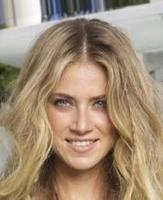

In [0]:
#display_result(filename, prediction, target)

display_result(pred_Attractive, pred_target_Attractive,
                   pred_Bald, pred_target_Bald,
                   pred_Black_Hair, pred_target_Black_Hair,
                   pred_Blond_Hair, pred_target_Blond_Hair,
                   pred_Brown_Hair, pred_target_Brown_Hair,
                   pred_Eyeglasses, pred_target_Eyeglasses,
                   pred_Gray_Hair, pred_target_Gray_Hair,
                   pred_Male, pred_target_Male,
                   pred_Mustache, pred_target_Mustache,
                   pred_No_Beard, pred_target_No_Beard,
                   pred_Pale_Skin, pred_target_Pale_Skin,
                   pred_Smiling, pred_target_Smiling,
                   pred_Straight_Hair, pred_target_Straight_Hair,
                   pred_Wavy_Hair, pred_target_Wavy_Hair,
                   pred_Young, pred_target_Young,
                   filename)